In [1]:
!pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 57 kB 3.6 MB/s 
     |████████████████████████████████| 812 kB 16.3 MB/s 
     |████████████████████████████████| 3.1 MB 34.7 MB/s 
     |████████████████████████████████| 47 kB 4.9 MB/s 
     |████████████████████████████████| 1.1 MB 47.3 MB/s 
     |████████████████████████████████| 13.5 MB 35.8 MB/s 
     |████████████████████████████████| 78 kB 5.8 MB/s 
     |████████████████████████████████| 4.9 MB 51.3 MB/s 
     |████████████████████████████████| 78 kB 4.1 MB/s 
     |████████████████████████████████| 96 kB 6.1 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |██████████████████████████████

In [12]:
!pip install Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.9 MB 8.5 MB/s 
  Created wheel for Image: filename=image-1.5.33-py2.py3-none-any.whl size=19496 sha256=aa7eb30efab33cca4ea01b6e7f724ab0288462a3c323a1d718ff1af80b85345b
  Stored in directory: /root/.cache/pip/wheels/56/88/e6/897194cfe8c08a8b9afd881d3bf53d102e13fa39607d721383
Successfully built Image


In [15]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
!pip install --ignore-installed Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 8.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rembg 2.0.25 requires pillow==9.2.0, but you have pillow 9.0.0 which is incompatible.


In [39]:
from google.colab.patches import cv2_imshow

In [29]:
from rembg import remove 
from PIL import Image 
import os
import cv2

In [31]:
import PIL.Image
if not hasattr(PIL.Image, 'Resampling'):  # Pillow<9.0
    PIL.Image.Resampling = PIL.Image

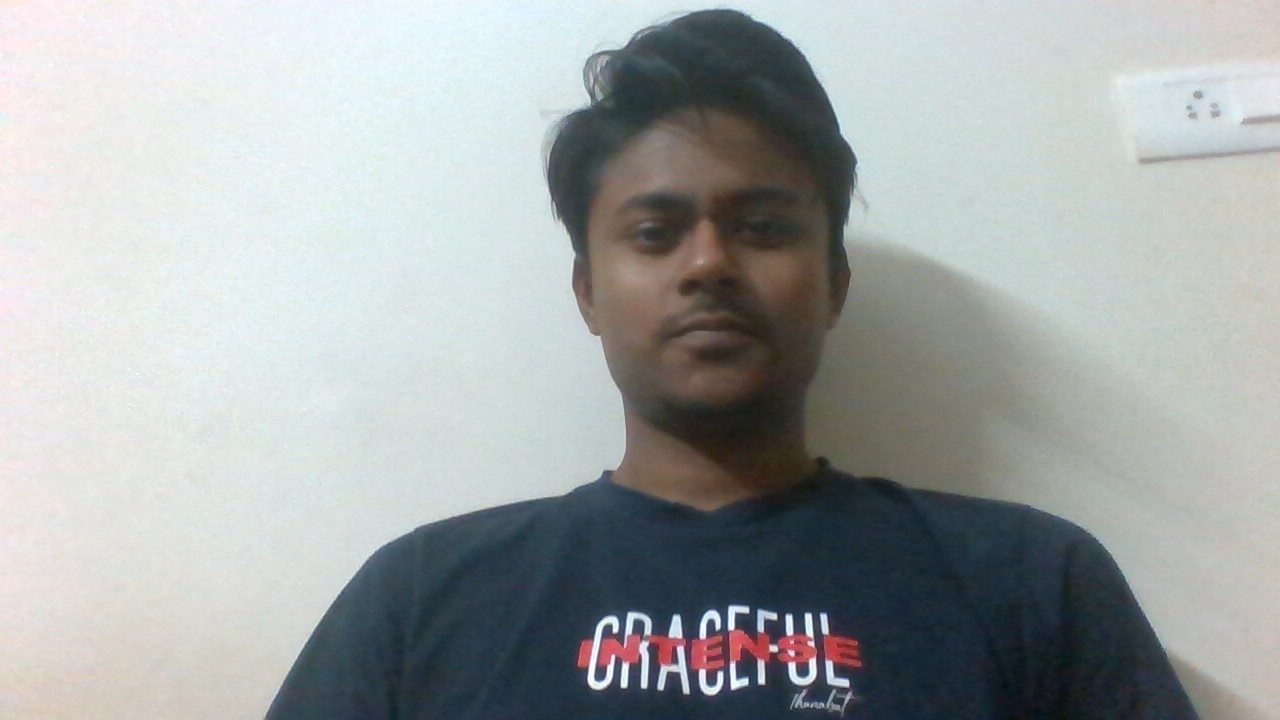

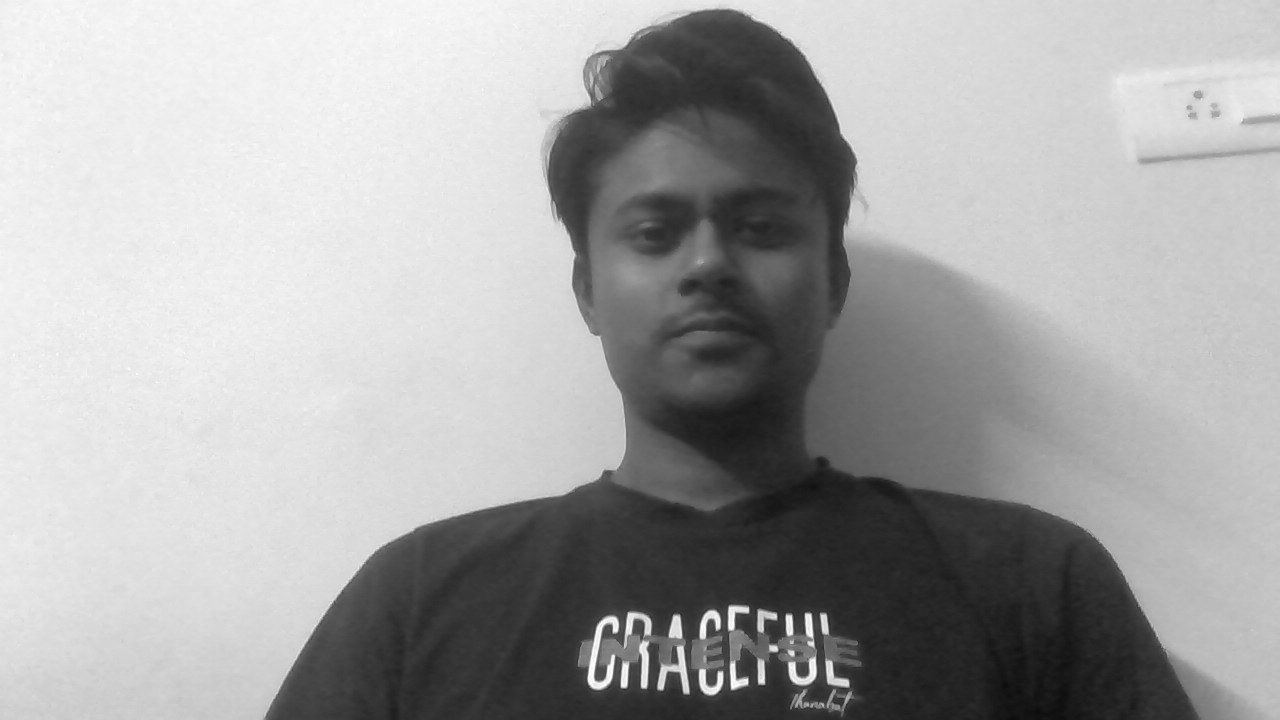

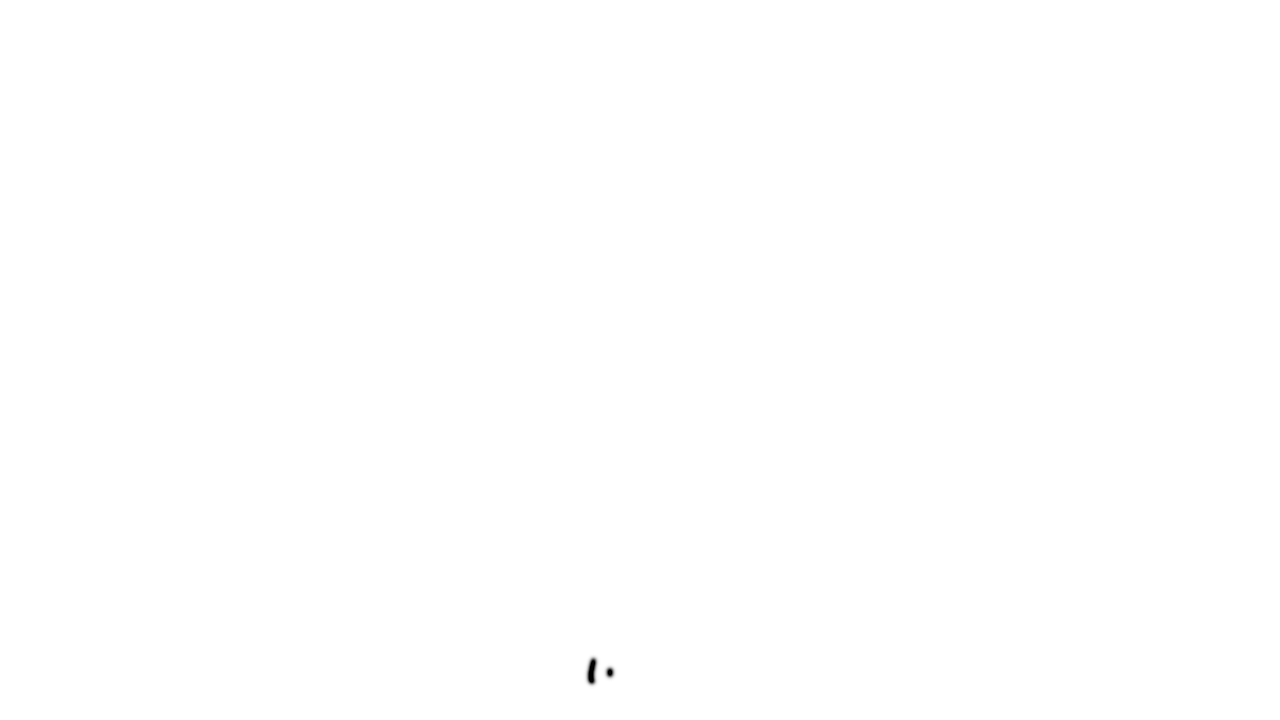

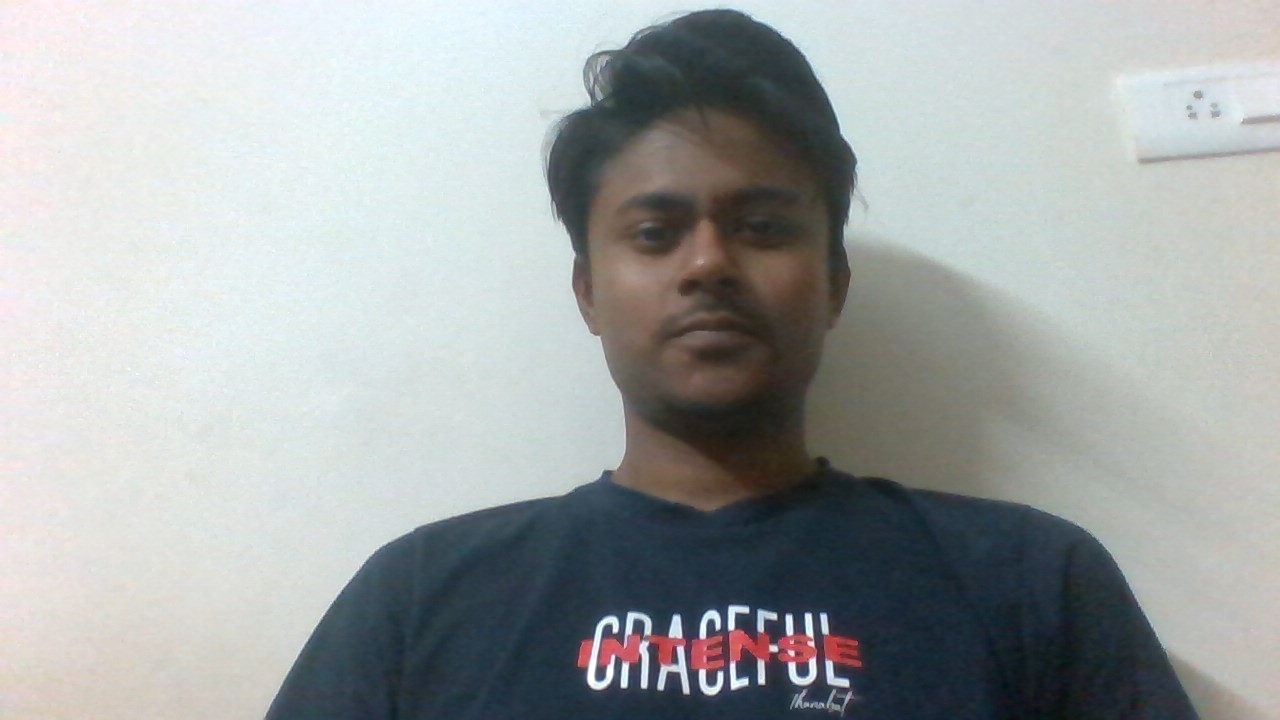

In [45]:
import cv2
import numpy as np

# load image
img = cv2.imread('person_image.jpg')

# convert to graky
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold input image as mask
mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

# negate mask
mask = 255 - mask

# apply morphology to remove isolated extraneous noise
# use borderconstant of black since foreground touches the edges
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# anti-alias the mask -- blur then stretch
# blur alpha channel
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

# put mask into alpha channel
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

# save resulting masked image
cv2.imwrite('person_transp_bckgrnd.png', result)

# display result, though it won't show transparency
cv2_imshow(img)
cv2_imshow(gray)
cv2_imshow(mask)
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

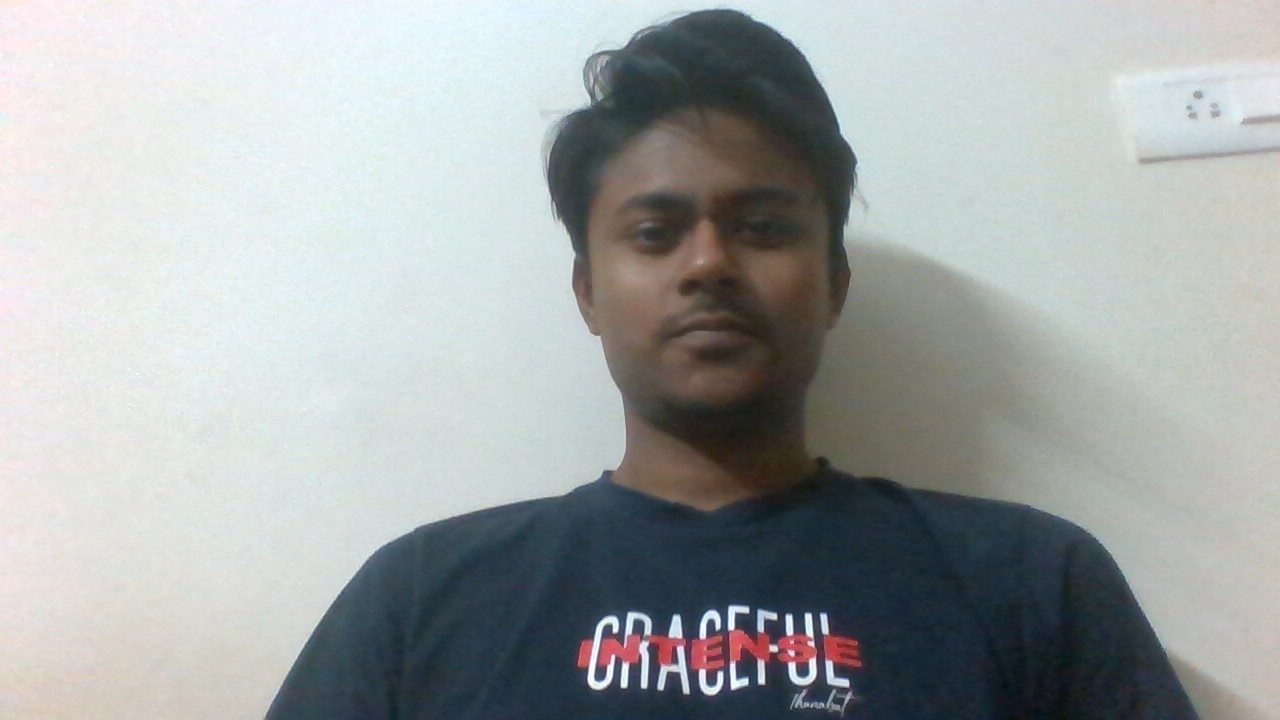

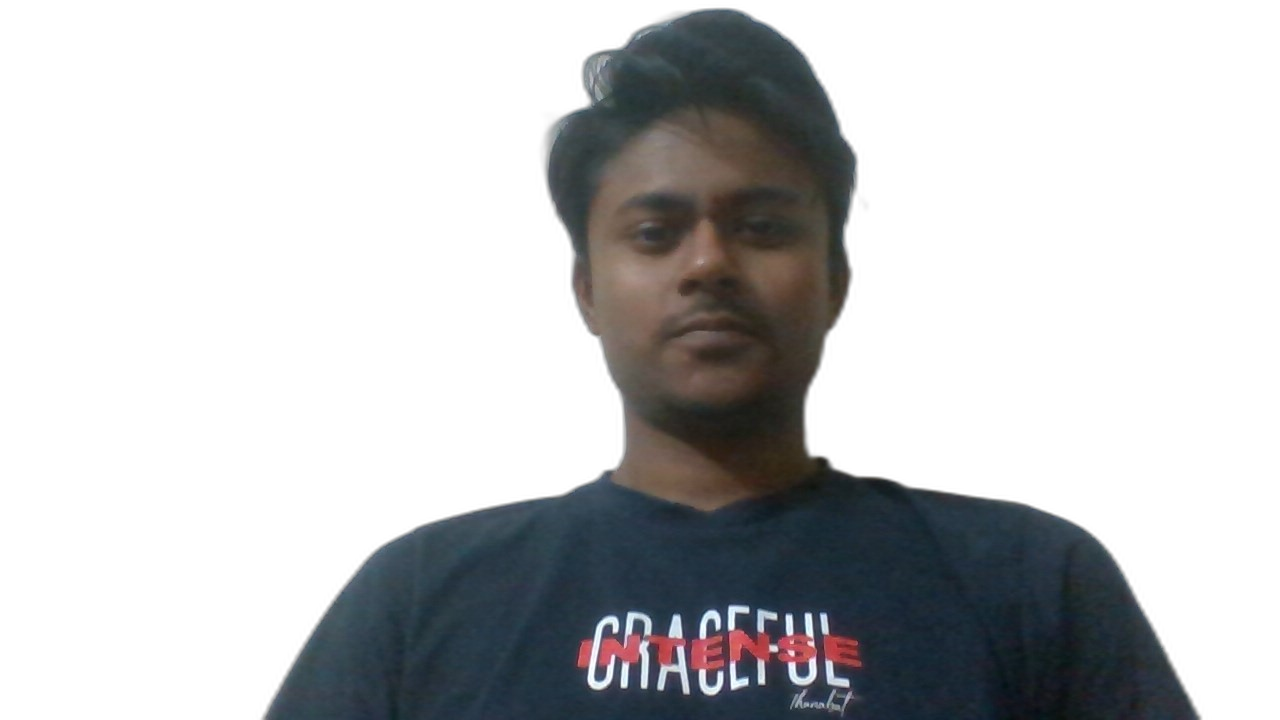

In [46]:
image_path = "person_image.jpg"
output_path = 'person_image_without_bg.png'
input_image = cv2.imread(image_path)
cv2_imshow(input_image)
output = remove(input_image)
cv2.imwrite(output_path,output)
cv2_imshow(output)

In [50]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges

def color_quantization(img, k):
    # Transform the image
    data = np.float32(img).reshape((-1, 3))

    # Determine criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

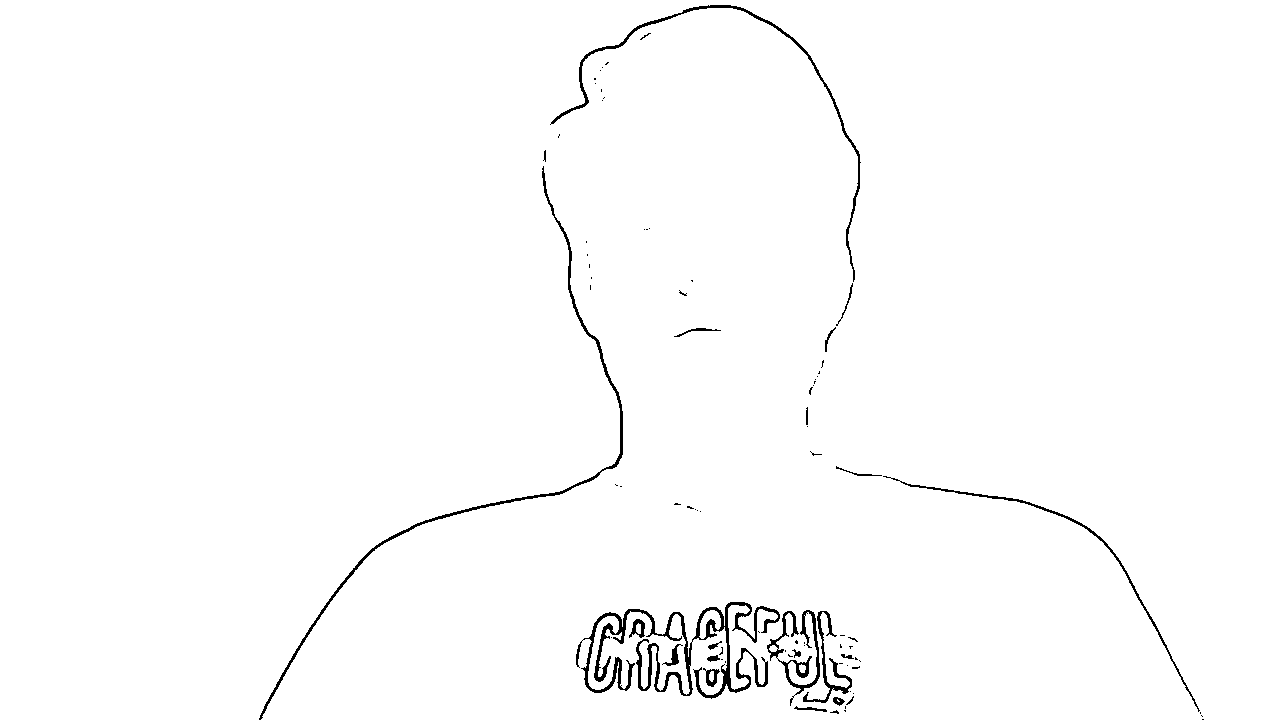

In [51]:
line_size = 7
blur_value = 7
edges = edge_mask(output, line_size, blur_value)
cv2_imshow(edges)

10


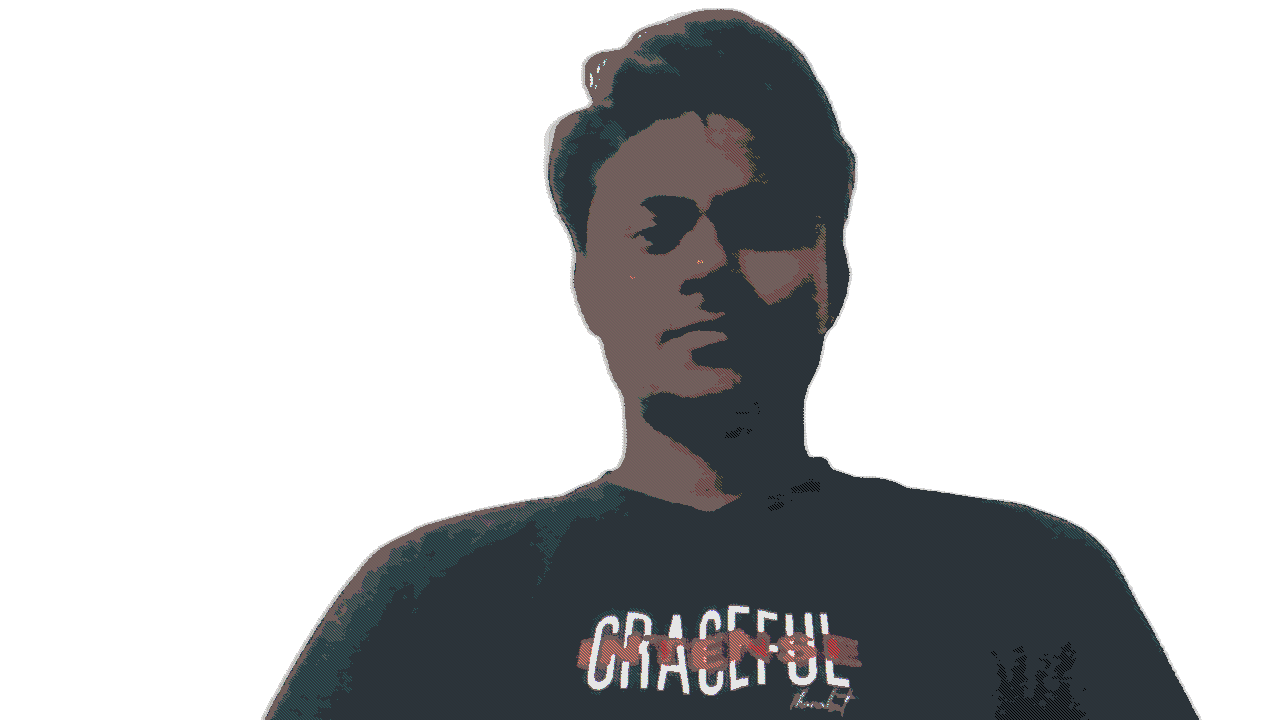

12


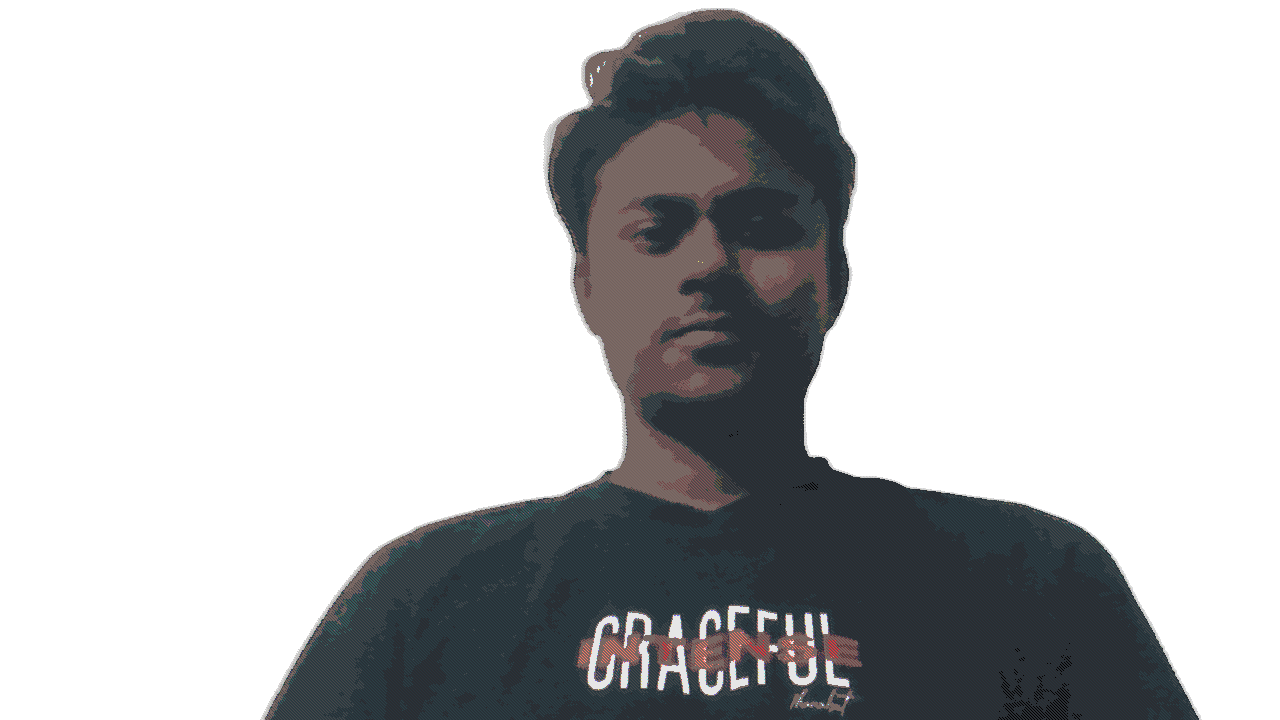

14


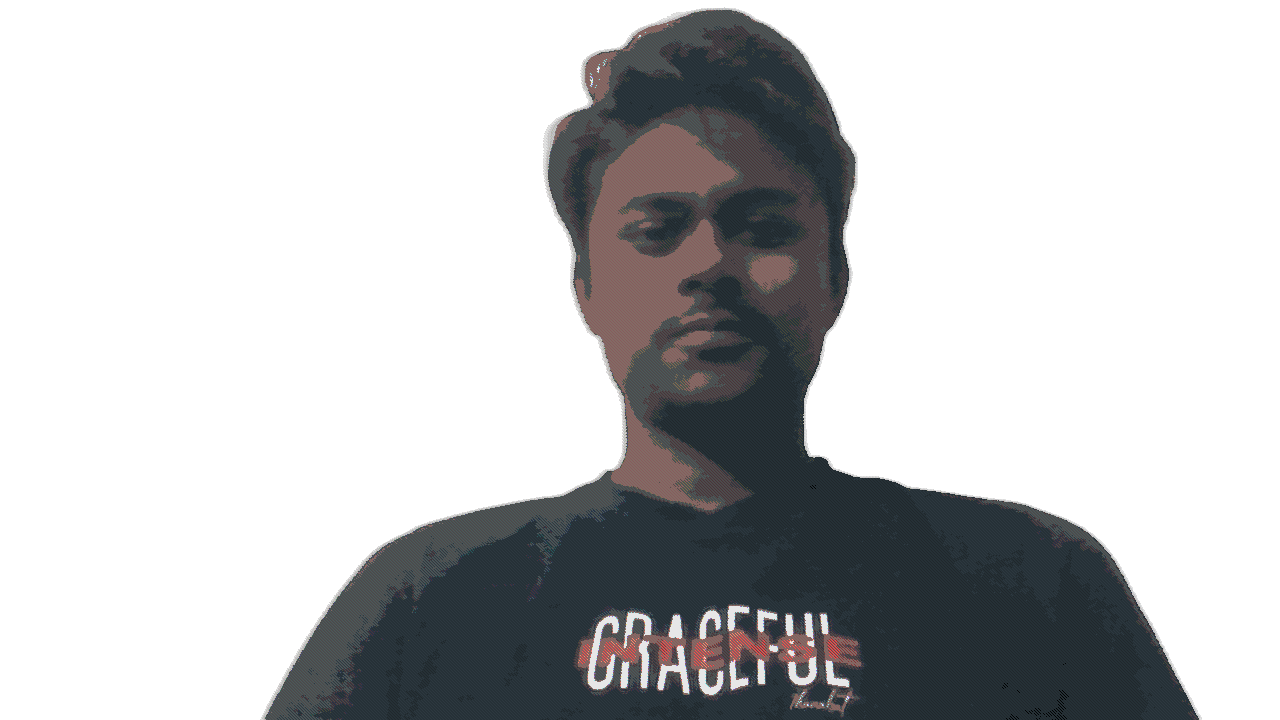

16


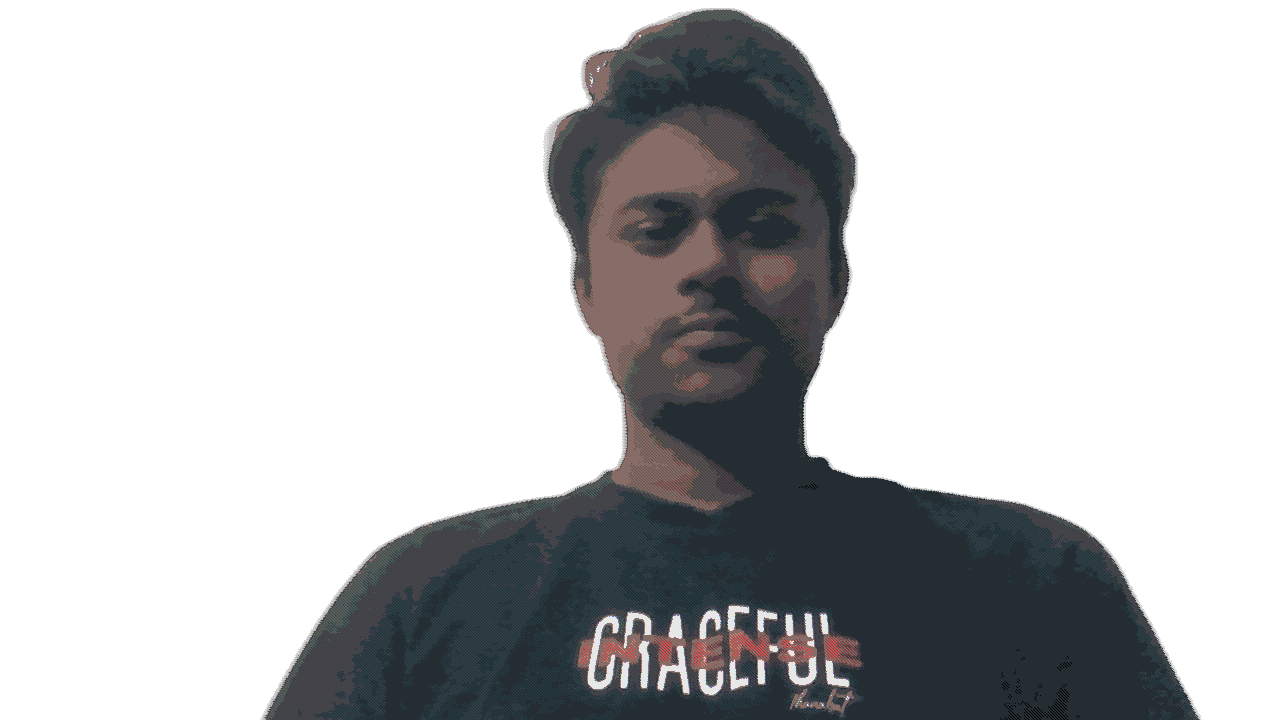

18


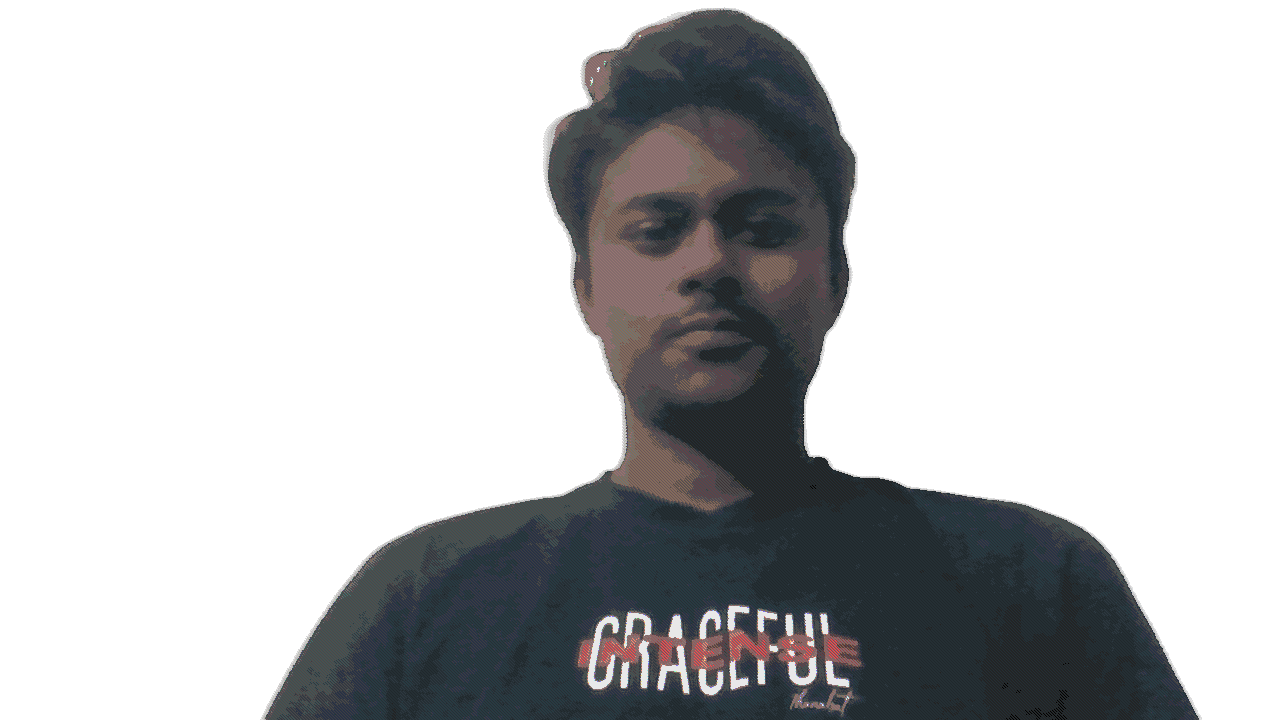

20


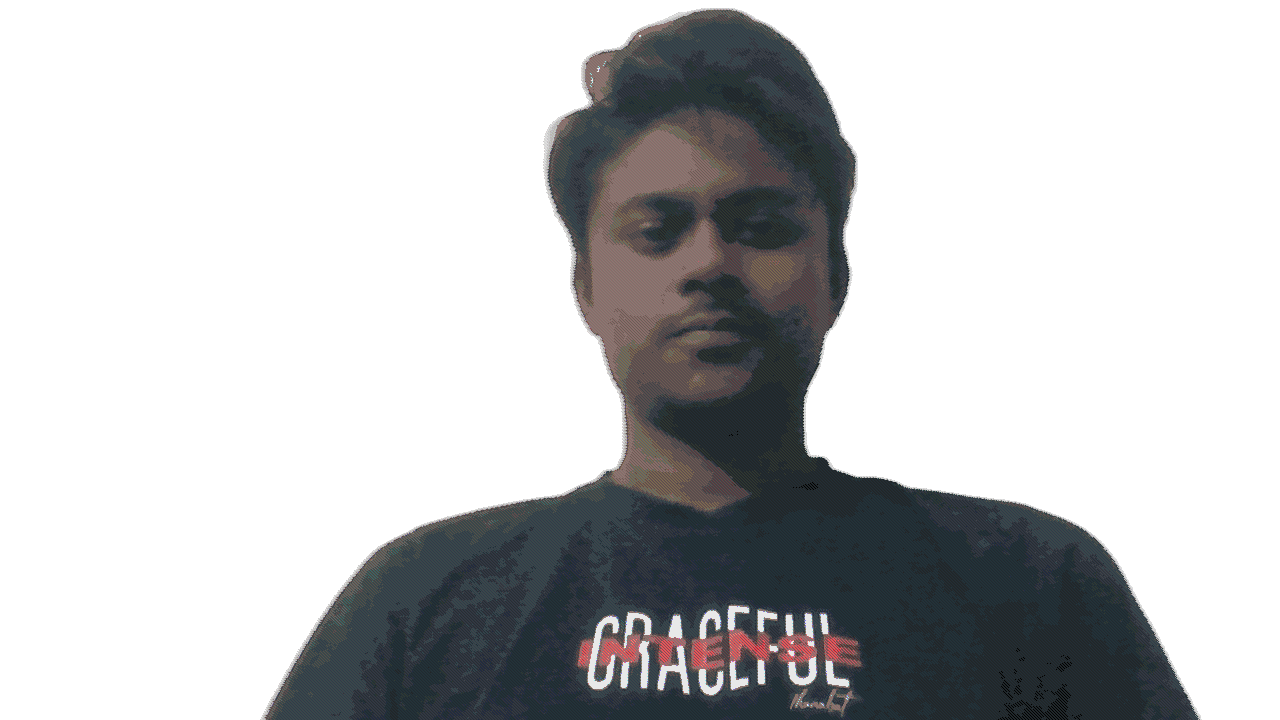

22


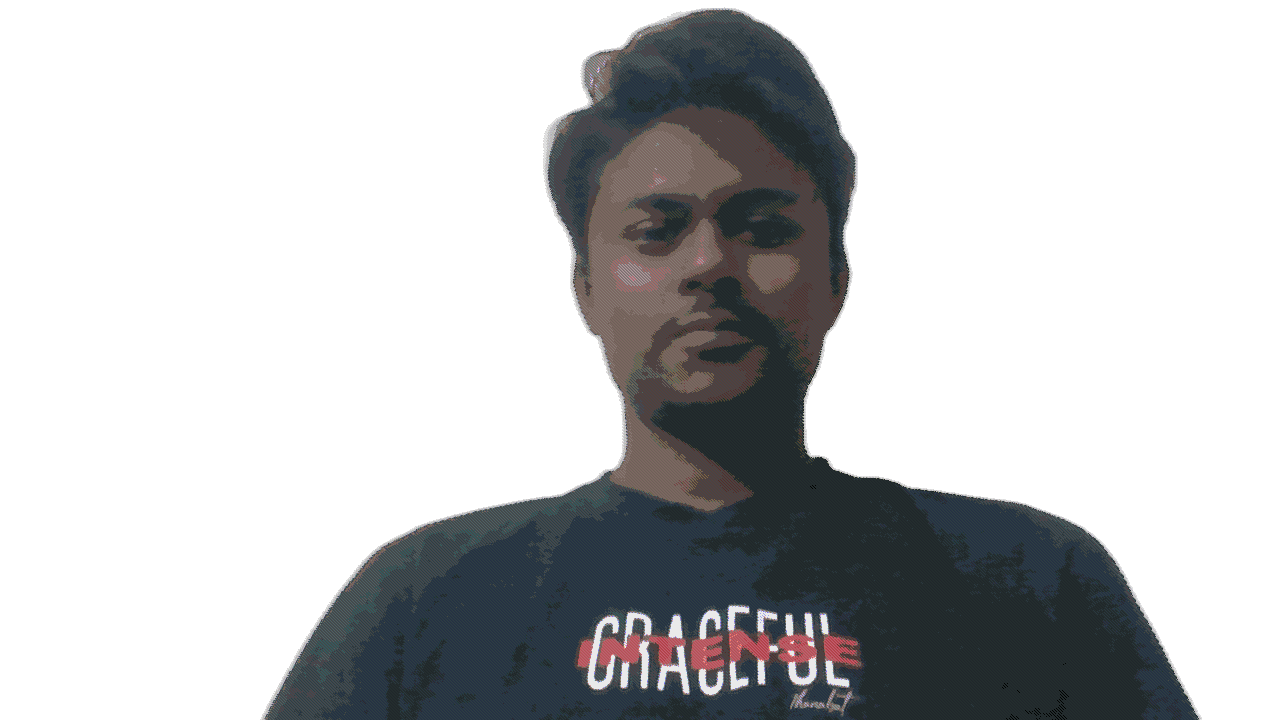

24


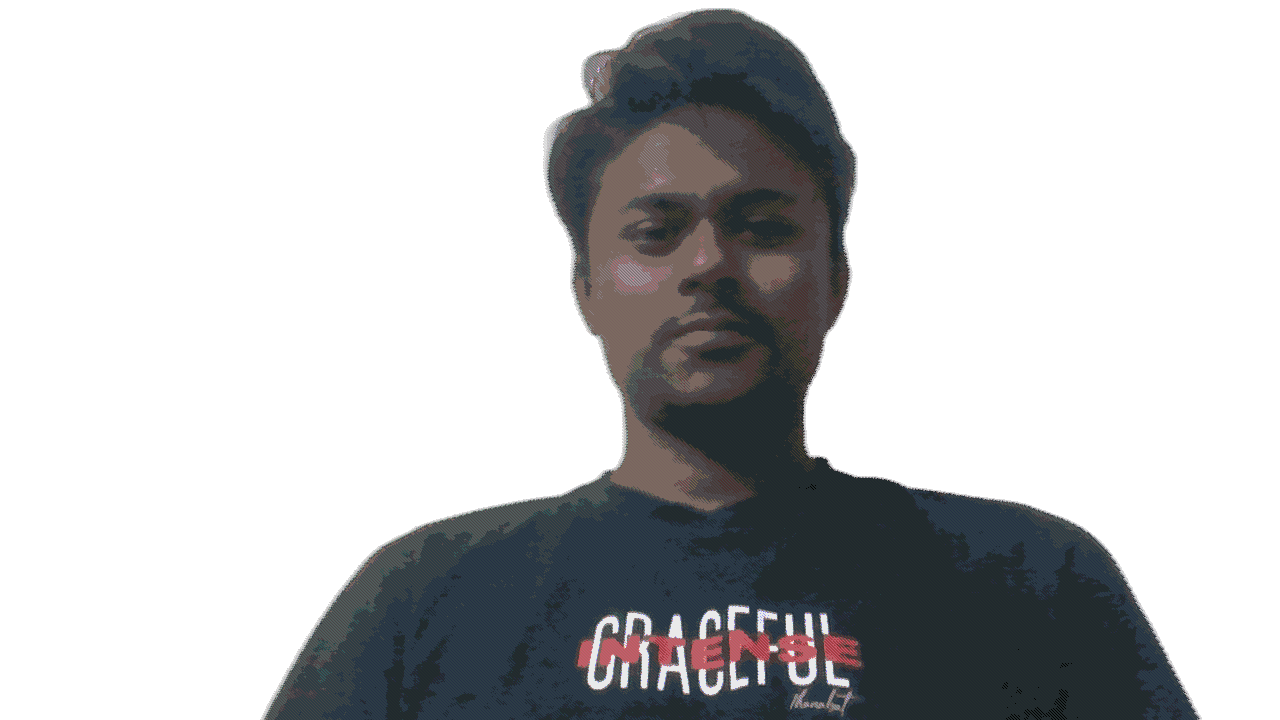

26


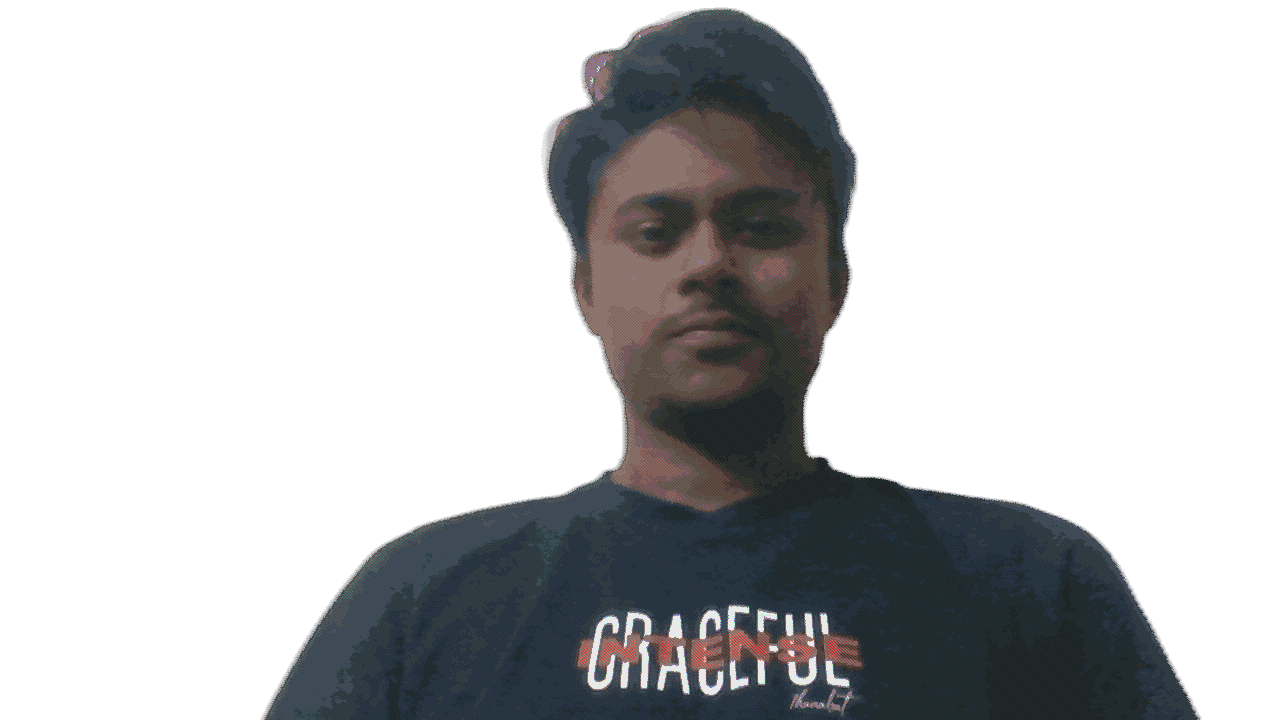

28


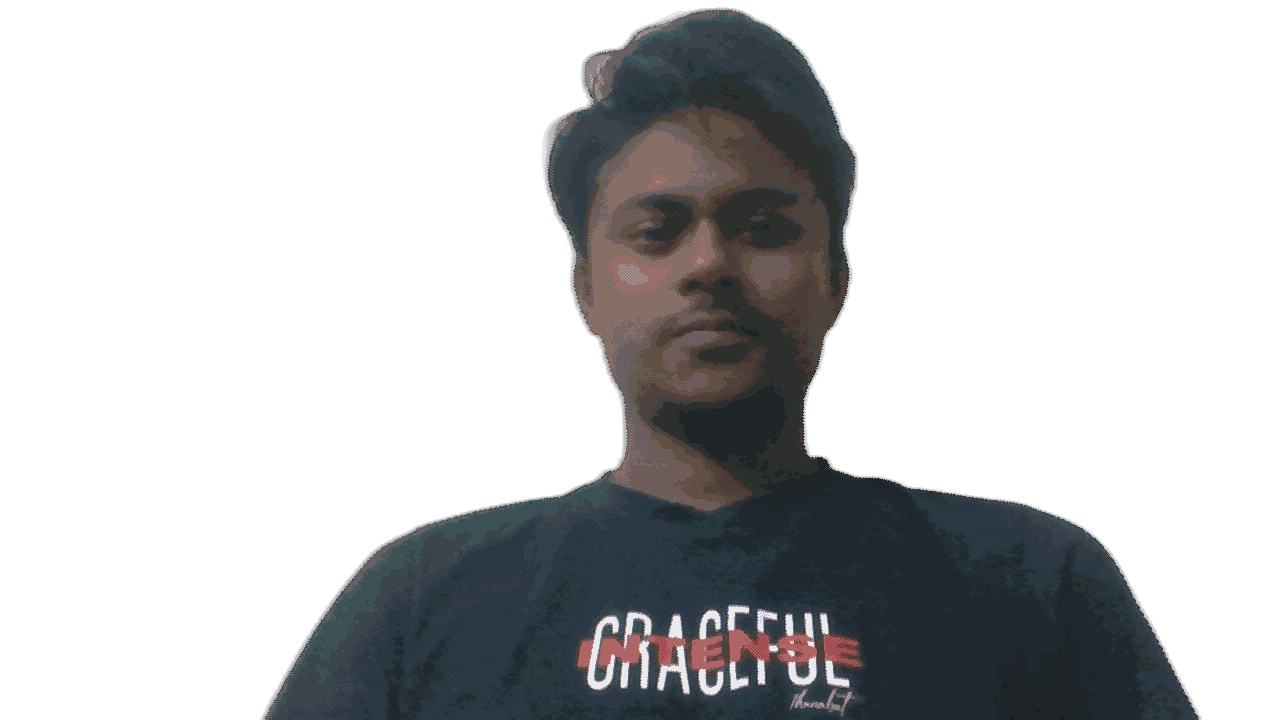

In [59]:
for i in range(10, 30, 2) : 
    print(i)
    img = color_quantization(output, i)
    cv2_imshow(img)